<a href="https://colab.research.google.com/github/sajnanoushad/employee--details/blob/main/employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Employee.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


Data Exploration: Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns.

In [3]:
print(df.shape)
df.info()

(148, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


From the info() we can infer that there are 148 rows and 6 coloumns in the dataframe. Three are of Numerical type and the other three are of categorical type.
The features such as Company, Age, Salary and Place are missing data, Thus there is a need to handle them appropriately

In [4]:
print(df.describe(include='all'))

       Company         Age       Salary   Place Country      Gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India         NaN
freq        53         NaN          NaN      37     148         NaN
mean       NaN   30.484615  5312.467742     NaN     NaN    0.222973
std        NaN   11.096640  2573.764683     NaN     NaN    0.417654
min        NaN    0.000000  1089.000000     NaN     NaN    0.000000
25%        NaN   22.000000  3030.000000     NaN     NaN    0.000000
50%        NaN   32.500000  5000.000000     NaN     NaN    0.000000
75%        NaN   37.750000  8000.000000     NaN     NaN    0.000000
max        NaN   54.000000  9876.000000     NaN     NaN    1.000000


There is outliers or Missing values

In [5]:
unique_values = {col: df[col].unique() for col in df.columns}
unique_lengths = {col: len(unique_values[col]) for col in df.columns}

In [6]:
print(" The number of Unique Values in each Feature is as follows \n")
for key, value in unique_lengths.items():
	print(f"{key}\t: {value}\n")
print("Uniques values in each Features are as follows\n")
for key, value in unique_values.items():
	print(f"{key}\n: {value}\n")

 The number of Unique Values in each Feature is as follows 

Company	: 7

Age	: 30

Salary	: 41

Place	: 12

Country	: 1

Gender	: 2

Uniques values in each Features are as follows

Company
: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']

Age
: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]

Salary
: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]

Place
: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']

Country
: ['India']

Gender
: [0 1]



want to handle 0 values and null values

In [7]:
df.rename(columns={'Company': 'Employer'}, inplace=True)
df

,Employer,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


data cleaning

In [8]:
print(df.isnull().sum())

Employer     8
Age         18
Salary      24
Place       14
Country      0
Gender       0
dtype: int64


In [9]:
print("Missing values in percentage\n")
print("Employer : ",df['Employer'].isnull().sum()/len(df)*100)
print("\nAge : ",df['Age'].isnull().sum()/len(df)*100)
print("\nSalary : ",df['Salary'].isnull().sum()/len(df)*100)
print("\nPlace : ",df['Place'].isnull().sum()/len(df)*100)

Missing values in percentage

Employer :  5.405405405405405

Age :  12.162162162162163

Salary :  16.216216216216218

Place :  9.45945945945946


In [10]:
df['Age'].replace(0, np.nan, inplace=True)
print(df.isnull().sum())

Employer     8
Age         24
Salary      24
Place       14
Country      0
Gender       0
dtype: int64


<ipython-input-10-0fcbef6ba409>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace(0, np.nan, inplace=True)


In [11]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
Pla = df['Place'].mode()
df['Place'] = df['Place'].fillna(Pla[0])
Emp = df['Employer'].mode()
df['Employer'] = df['Employer'].fillna(Emp[0])

In [12]:
print(df.isnull().sum())

Employer    0
Age         0
Salary      0
Place       0
Country     0
Gender      0
dtype: int64


In [13]:
df.duplicated().sum()

4

In [14]:
df.drop_duplicates(inplace =True)
print(f"Checking for duplicates after removal : {df.duplicated().sum()}")
print(f" \nShape of Dataframe after removal : {df.shape}")

Checking for duplicates after removal : 0
 
Shape of Dataframe after removal : (144, 6)


In [15]:
print (f"Skewness of Age feature : {df['Age'].skew()}\n")
print (f"Skewness of Salary feature : {df['Salary'].skew()}\n")

Skewness of Age feature : 0.2276688715743698

Skewness of Salary feature : 0.2589335143075592



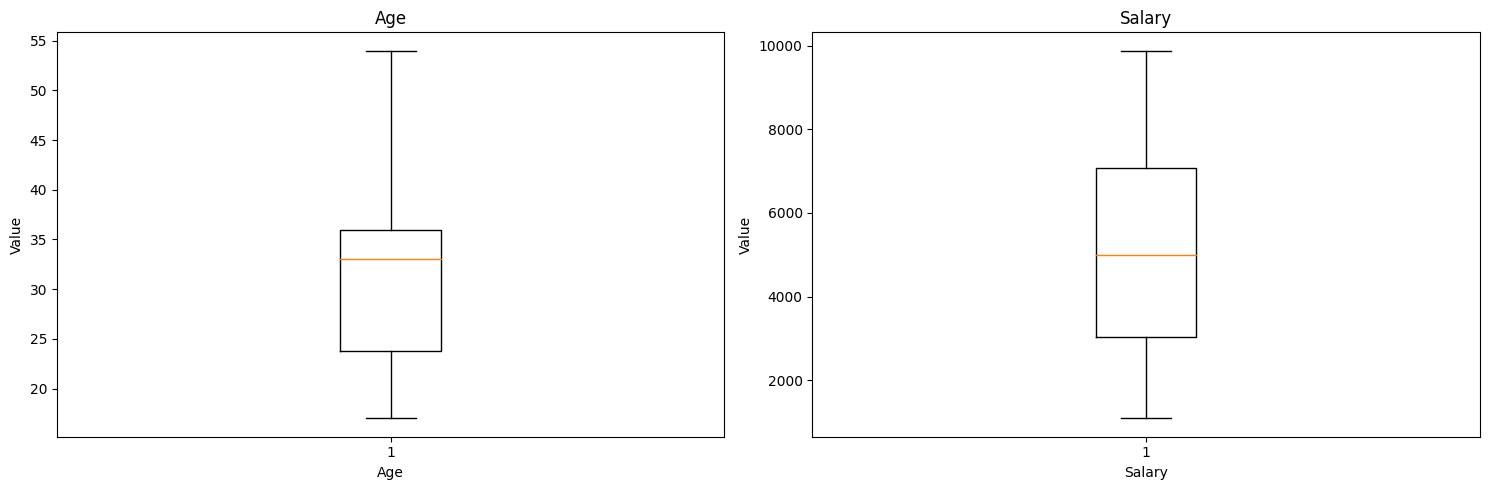

In [16]:


fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].boxplot(df['Age'])
axs[0].set_title('Age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Value')
# Plots Boxplot for Data 2
axs[1].boxplot(df['Salary'])
axs[1].set_title('Salary')
axs[1].set_xlabel('Salary')
axs[1].set_ylabel('Value')
# Adjusts layout
plt.tight_layout()
plt.show()

In [17]:
df.describe()

,Age,Salary,Gender
count,144.000000,144.000000,144.000000
mean,32.194444,5238.194444,0.222222
std,8.242206,2370.641804,0.417191
min,17.000000,1089.000000,0.000000
25%,23.750000,3045.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,36.000000,7084.000000,0.000000
max,54.000000,9876.000000,1.000000


In [18]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df[(df['Age'] < (Q1 - 1.5 * IQR)) |
                   (df['Age'] > (Q3 + 1.5 * IQR))]
df_cleaned_iqr = df[~df.index.isin(outliers_iqr.index)]
print (f"Ouliers in Age : {outliers_iqr }")

Ouliers in Age : Empty DataFrame
Columns: [Employer, Age, Salary, Place, Country, Gender]
Index: []


In [19]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df[(df['Salary'] < (Q1 - 1.5 * IQR)) |
                   (df['Salary'] > (Q3 + 1.5 * IQR))]
df_cleaned_iqr = df[~df.index.isin(outliers_iqr.index)]
print (f"Ouliers in Salary : {outliers_iqr }")

Ouliers in Salary : Empty DataFrame
Columns: [Employer, Age, Salary, Place, Country, Gender]
Index: []


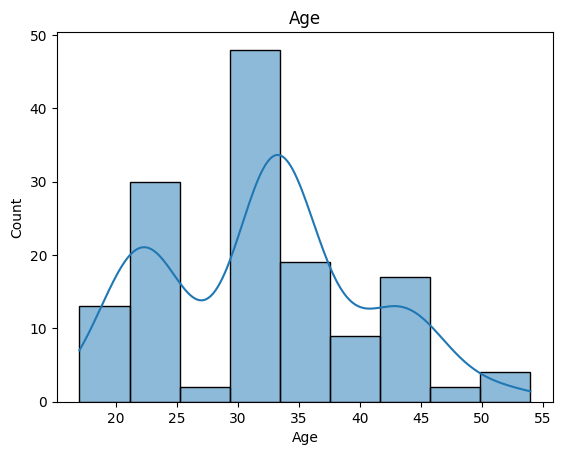

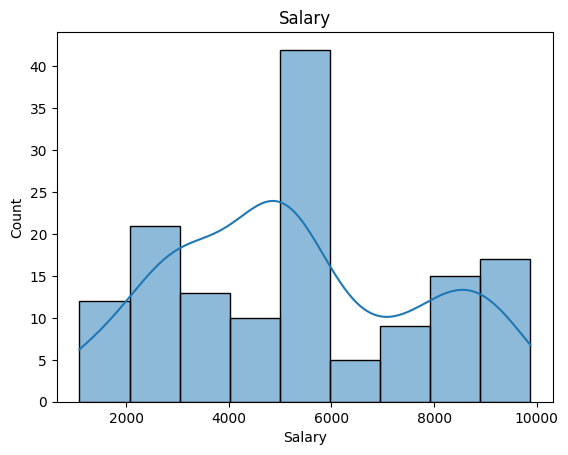

In [20]:
sns.histplot(df_cleaned_iqr ['Age'], kde=True)
plt.title('Age')
plt.show()
sns.histplot(df_cleaned_iqr ['Salary'], kde=True)
plt.title('Salary')
plt.show()

Data Analysis: Filter the data with age >40 and salary<5000 Plot the chart with age and salary Count the number of people from each place and represent it visually

In [21]:
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
filtered_data

,Employer,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


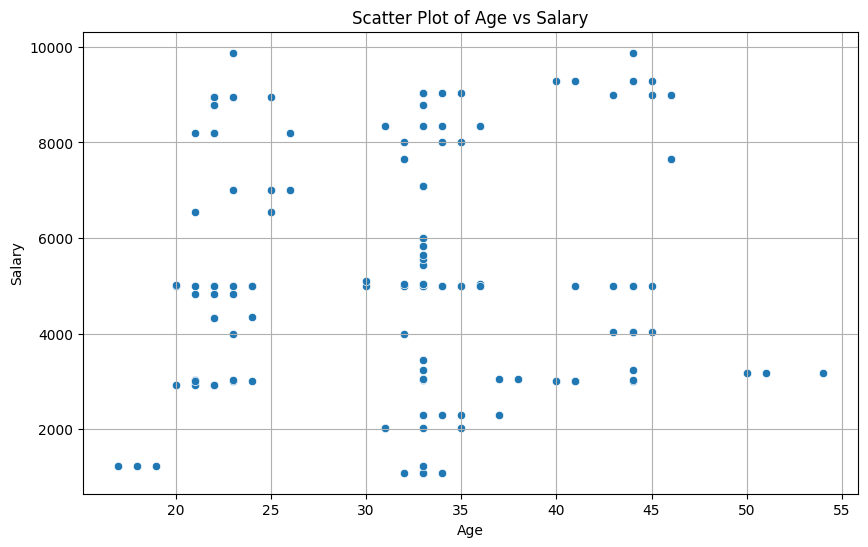

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title('Scatter Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

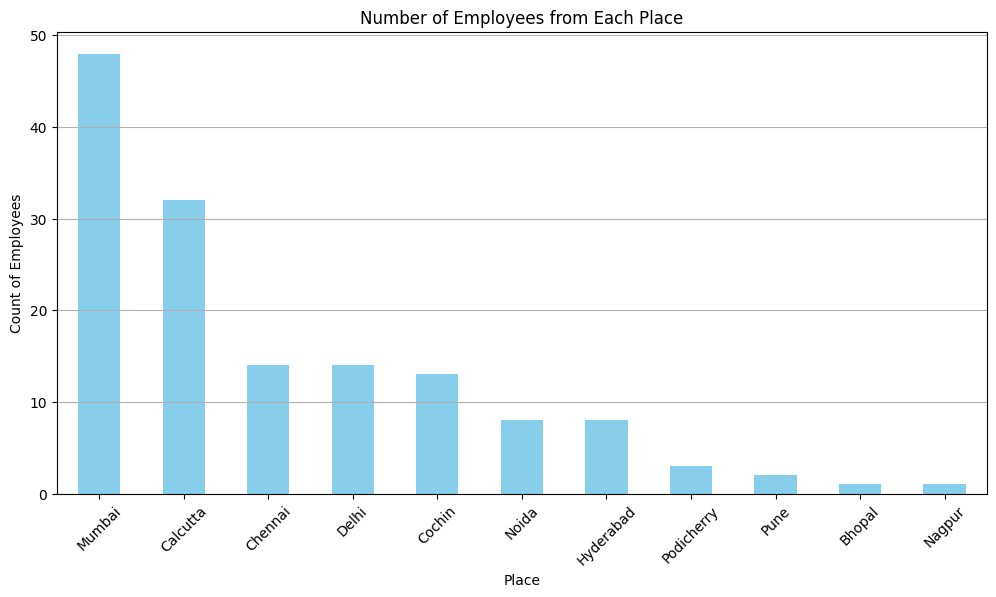

In [23]:

place_counts = df['Place'].value_counts()
plt.figure(figsize=(12, 6))
place_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Employees from Each Place')
plt.xlabel('Place')
plt.ylabel('Count of Employees')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Data Encoding:Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Employer  144 non-null    object 
 1   Age       144 non-null    float64
 2   Salary    144 non-null    float64
 3   Place     144 non-null    object 
 4   Country   144 non-null    object 
 5   Gender    144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


In [25]:
df_copy = df
df_copy

,Employer,Age,Salary,Place,Country,Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [26]:
df_copy = pd.get_dummies(df_copy, columns=['Employer','Country', 'Place'],dtype =int)

Feature Scaling: After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [27]:
df_copy

,Age,Salary,Gender,Employer_CTS,Employer_Congnizant,Employer_Infosys,Employer_Infosys Pvt Lmt,Employer_TCS,Employer_Tata Consultancy Services,Country_India,...,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,20.0,5000.0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,30.0,5000.0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,35.0,2300.0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,40.0,3000.0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,23.0,4000.0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
143,33.0,9024.0,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
145,44.0,4034.0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
146,33.0,5034.0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
df_copy[['Age', 'Salary']] = scaler.fit_transform(df_copy[['Age', 'Salary']])

In [29]:

df_copy

,Age,Salary,Gender,Employer_CTS,Employer_Congnizant,Employer_Infosys,Employer_Infosys Pvt Lmt,Employer_TCS,Employer_Tata Consultancy Services,Country_India,...,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,-1.484676,-0.100827,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,-0.267174,-0.100827,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.341577,-1.243735,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0.950328,-0.947426,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,-1.119426,-0.524127,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,-1.241176,1.254576,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
143,0.098077,1.602528,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
145,1.437329,-0.509734,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
146,0.098077,-0.086435,1,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [30]:

min_max_scaler = MinMaxScaler()
df_copy[['Age', 'Salary']] = min_max_scaler.fit_transform(df_copy[['Age', 'Salary']])
df_copy

,Age,Salary,Gender,Employer_CTS,Employer_Congnizant,Employer_Infosys,Employer_Infosys Pvt Lmt,Employer_TCS,Employer_Tata Consultancy Services,Country_India,...,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,0.081081,0.445089,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0.351351,0.445089,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.486486,0.137817,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0.621622,0.217480,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0.162162,0.331285,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.135135,0.809491,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
143,0.432432,0.903039,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
145,0.729730,0.335154,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
146,0.432432,0.448959,1,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
